# CS1340 Lab 4

### In this lab, we will be using python for stock analysis. The packages will be used include numpy, pandas, pandas_datareader, matplotlib. (Use conda install pandas_datareader to install this package). 

In [1]:
# Step one, input all the packages 

import numpy as np
import pandas as pd
from pandas.testing import assert_frame_equal
from pandas_datareader import data

import matplotlib.pyplot as plt


# This following line will make the plot embedded in this notebook, instead of open a new window
%matplotlib inline 

## Data preparation

In [2]:
# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2010-01-01'
end_date = '2018-12-31'

stock_list = ['GOOG', 'AAPL', 'MSFT']

panel_data = data.DataReader(stock_list, start=start_date, end=end_date,
                       data_source='yahoo')
panel_data.head()


Attributes   Adj Close                             Close             \
Symbols           GOOG       AAPL       MSFT        GOOG       AAPL   
Date                                                                  
2010-01-04  312.204773  26.538483  24.294369  312.204773  30.572857   
2010-01-05  310.829926  26.584366  24.302216  310.829926  30.625713   
2010-01-06  302.994293  26.161509  24.153070  302.994293  30.138571   
2010-01-07  295.940735  26.113146  23.901886  295.940735  30.082857   
2010-01-08  299.885956  26.286753  24.066734  299.885956  30.282858   

Attributes                   High                               Low  \
Symbols          MSFT        GOOG       AAPL       MSFT        GOOG   
Date                                                                  
2010-01-04  30.950001  313.579620  30.642857  31.100000  310.954468   
2010-01-05  30.959999  312.747742  30.798571  31.100000  309.609497   
2010-01-06  30.770000  311.761444  30.747143  31.080000  302.047852   
2010-01-07  30.450001  303.861053  30.285715  30.700001  295.218445   
2010-01-08  30.660000  300.498657  30.285715  30.879999  293.455048   

Attributes                              Open                        \
Symbols          AAPL       MSFT        GOOG       AAPL       MSFT   
Date                                                                 
2010-01-04  30.340000  30.590000  312.304413  30.490000  30.620001   
2010-01-05  30.464285  30.639999  312.418976  30.657143  30.850000   
2010-01-06  30.107143  30.520000  311.761444  30.625713  30.879999   
2010-01-07  29.864286  30.190001  303.562164  30.250000  30.629999   
2010-01-08  29.865715  30.240000  294.894653  30.042856  30.280001   

Attributes      Volume                           
Symbols           GOOG         AAPL        MSFT  
Date                                             
2010-01-04   3927000.0  123432400.0  38409100.0  
2010-01-05   6031900.0  150476200.0  49749600.0  
2010-01-06   7987100.0  138040000.0  58182400.0  
2010-01-07  12876600.0  119282800.0  50559700.0  
2010-01-08   9483900.0  111902700.0  51197400.0

We want to make sure that all weekdays are included in our dataset, which is very often desirable for quantitative trading strategies. But, some of the weekdays might be public holidays in which case no price will be available.

In [3]:
# Q1 Create a new dataframe from panel_data.  (20 points)

#   - This dataframe will only include 'Close' price information for these three stocks.  
#   - This dataframe has all weekdays as indexes (from state_date to end_date). (Hint, pd.date_range, reindex method)
#   - Fill in missing values using forward fill . 

In [4]:
newdf = panel_data.loc[:, 'Close']
newdf.head()
newdf.reset_index()
newdf.fillna(method='ffill')

Symbols,GOOG,AAPL,MSFT
Date,,,
2010-01-04,312.204773,30.572857,30.950001
2010-01-05,310.829926,30.625713,30.959999
2010-01-06,302.994293,30.138571,30.770000
2010-01-07,295.940735,30.082857,30.450001
2010-01-08,299.885956,30.282858,30.660000
...,...,...,...
2018-12-24,976.219971,146.830002,94.129997
2018-12-26,1039.459961,157.169998,100.559998
2018-12-27,1043.880005,156.149994,101.180000


In [5]:
# Q2 Print the overall statistics for this dataframe (describe method) (10 points)

In [6]:
print(newdf.describe)
print(newdf.index)

<bound method NDFrame.describe of Symbols            GOOG        AAPL        MSFT
Date                                           
2010-01-04   312.204773   30.572857   30.950001
2010-01-05   310.829926   30.625713   30.959999
2010-01-06   302.994293   30.138571   30.770000
2010-01-07   295.940735   30.082857   30.450001
2010-01-08   299.885956   30.282858   30.660000
...                 ...         ...         ...
2018-12-24   976.219971  146.830002   94.129997
2018-12-26  1039.459961  157.169998  100.559998
2018-12-27  1043.880005  156.149994  101.180000
2018-12-28  1037.079956  156.229996  100.389999
2018-12-31  1035.609985  157.740005  101.570000

[2264 rows x 3 columns]>
DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24'

In [7]:
# Q3 Get the Google time series data. Use groupby() and mean() method to get the average month price and plot them
# using matplotlib (20 points)

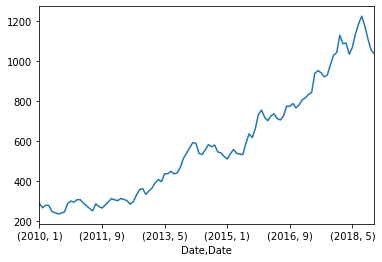

In [8]:
GOOGdf = newdf.loc[:, 'GOOG']
GOOGdf.groupby([newdf.index.year, newdf.index.month]).mean().plot()

In [9]:
# Q4 Get the Google time series data. Using the rolling method to get the 50 days and 100 days moving average 
# and plot them as well as the original data (30 points)

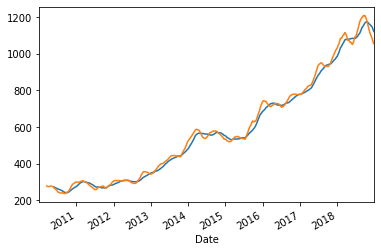

In [10]:
GOOGdf.rolling(100).mean().plot()
GOOGdf.rolling(50).mean().plot()

## Simple trading strategy

When considering a stock, we usually will look at the returns. Relative returns and Log returns are two commonly used ones. They could be calculated using the the equations:

$r_{relative}(t) = \frac{p(t) - p(t-1)}{p(t-1)}$ 

$r_{log}(t) = log\frac{p(t)}{p(t-1)}$

In [11]:
# Q4 calculate the relative returns and log returns and print them out (10 points)  

In [12]:
returns = GOOGdf.pct_change()
print(returns)

Log_Returns = np.log(GOOGdf) - np.log(GOOGdf.shift(1))
print(Log_Returns)

Date
2010-01-04         NaN
2010-01-05   -0.004404
2010-01-06   -0.025209
2010-01-07   -0.023280
2010-01-08    0.013331
                ...   
2018-12-24   -0.003389
2018-12-26    0.064780
2018-12-27    0.004252
2018-12-28   -0.006514
2018-12-31   -0.001417
Name: GOOG, Length: 2264, dtype: float64
Date
2010-01-04         NaN
2010-01-05   -0.004413
2010-01-06   -0.025532
2010-01-07   -0.023555
2010-01-08    0.013243
                ...   
2018-12-24   -0.003395
2018-12-26    0.062769
2018-12-27    0.004243
2018-12-28   -0.006536
2018-12-31   -0.001418
Name: GOOG, Length: 2264, dtype: float64


In [13]:
# Q5 Create your own analysis (could be any analysis, 10 points)

In [14]:
newdf.groupby([newdf.index.year, newdf.index.month]).mean().var() 
#this output calculates variances between average stock prices of Google, Apple, and Microsoft from Jan 2010 - December 2018. 
#Google has the highest average monthly variances, thus its average stock prices are more volatile than Apples and Microsoft.

Symbols
GOOG    80740.225692
AAPL     2189.556109
MSFT      574.209644
dtype: float64